In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
data = pd.read_csv('/home/binit/HistoryOfNepal/Amusement_Park_ABC_Data.xlsx - Amusement_Park_Data.csv')
data.head(10)

,Date,Visitor_ID,Geographic_Origin,Age,Gender,Location,Ticket Type,Ticket Price per Visitor,No of Visitors,Type_of_Ride_Preferred,Accompanied_by_Children,Number_of_Rides_Played,Check_In_Time,Check_Out_Time,Visitor_Satisfaction,Ride_Quality_Rating,Cleanliness_Rating,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,4/11/2022,V100000,Local,20,Female,China,Fast Track,3200,6,Water Slides,Yes,12,10:05,15:13,3.9,2.0,3.6,NaN,NaN,NaN
1,26/2/2023,V100001,International,34,Male,China,Regular,2000,6,Swing Rides,Yes,7,11:35,18:46,4.8,2.6,3.7,NaN,NaN,NaN
2,23/6/2020,V100002,Domestic,31,Female,Nepal,Fast Track,1500,3,Drop Towers,Yes,9,13:16,19:00,3.9,3.8,3.3,NaN,NaN,NaN
3,21/5/2022,V100003,Domestic,31,Male,Nepal,Regular,1500,6,Bumper Cars,No,3,12:30,16:42,4.5,2.4,4.4,NaN,NaN,NaN
4,4/6/2023,V100004,International,32,Male,Singapore,Regular,1800,4,Ferris Wheels,Yes,5,12:18,16:19,4.1,2.2,3.7,NaN,NaN,NaN
5,17/2/2022,V100005,Domestic,22,Male,Nepal,Regular,1500,6,Water Slides,Yes,12,11:52,18:46,3.9,2.7,5.0,NaN,NaN,NaN
6,3/11/2023,V100006,Domestic,20,Male,Singapore,Fast Track,3000,6,Ferris Wheels,No,5,13:56,14:09,3.9,3.1,4.4,NaN,NaN,NaN
7,10/9/2018,V100007,Local,33,Female,China,Fast Track,2000,2,Ferris Wheels,No,10,13:19,17:35,4.3,2.5,3.6,NaN,NaN,NaN
8,4/4/2018,V100008,Domestic,29,Male,China,Fast Track,2000,6,Water Slides,No,10,12:07,15:25,4.5,2.6,5.0,NaN,NaN,NaN
9,5/6/2018,V100009,Local,31,Female,Singapore,Regular,1200,4,Roller Coasters,No,6,10:02,15:40,4.5,3.0,3.1,NaN,NaN,NaN


In [11]:
data.columns

Index(['Date', 'Visitor_ID', 'Geographic_Origin', 'Age', 'Gender', 'Location',
       'Ticket Type', 'Ticket Price per Visitor', 'No of Visitors',
       'Type_of_Ride_Preferred', 'Accompanied_by_Children',
       'Number_of_Rides_Played', 'Check_In_Time', 'Check_Out_Time',
       'Visitor_Satisfaction', 'Ride_Quality_Rating', 'Cleanliness_Rating',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [12]:
data.isnull().sum()

Date                            0
Visitor_ID                      0
Geographic_Origin               0
Age                             0
Gender                          0
Location                        0
Ticket Type                     0
Ticket Price per Visitor        0
No of Visitors                  0
Type_of_Ride_Preferred          0
Accompanied_by_Children         0
Number_of_Rides_Played          0
Check_In_Time                   0
Check_Out_Time                  0
Visitor_Satisfaction            0
Ride_Quality_Rating             0
Cleanliness_Rating              0
Unnamed: 17                 70523
Unnamed: 18                 70522
Unnamed: 19                 70522
dtype: int64

In [13]:
data = data.drop(columns=['Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Visitor_ID'])
data

,Date,Geographic_Origin,Age,Gender,Location,Ticket Type,Ticket Price per Visitor,No of Visitors,Type_of_Ride_Preferred,Accompanied_by_Children,Number_of_Rides_Played,Check_In_Time,Check_Out_Time,Visitor_Satisfaction,Ride_Quality_Rating,Cleanliness_Rating
0,4/11/2022,Local,20,Female,China,Fast Track,3200,6,Water Slides,Yes,12,10:05,15:13,3.9,2.0,3.6
1,26/2/2023,International,34,Male,China,Regular,2000,6,Swing Rides,Yes,7,11:35,18:46,4.8,2.6,3.7
2,23/6/2020,Domestic,31,Female,Nepal,Fast Track,1500,3,Drop Towers,Yes,9,13:16,19:00,3.9,3.8,3.3
3,21/5/2022,Domestic,31,Male,Nepal,Regular,1500,6,Bumper Cars,No,3,12:30,16:42,4.5,2.4,4.4
4,4/6/2023,International,32,Male,Singapore,Regular,1800,4,Ferris Wheels,Yes,5,12:18,16:19,4.1,2.2,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70518,23/8/2023,Local,27,female,Singapore,Regular,1800,4,Ferris Wheels,No,9,11:45,18:28,2.8,2.8,3.1
70519,13/1/2020,Local,22,male,Nepal,Fast Track,1500,4,Bumper Cars,Yes,7,13:12,17:16,2.9,4.4,4.2
70520,26/8/2023,Local,24,female,Nepal,Regular,1500,2,Roller Coasters,Yes,9,11:02,18:00,2.5,3.3,4.3
70521,11/6/2020,Local,25,male,Nepal,Fast Track,1500,2,Water Slides,Yes,8,10:19,16:19,2.8,2.7,2.1


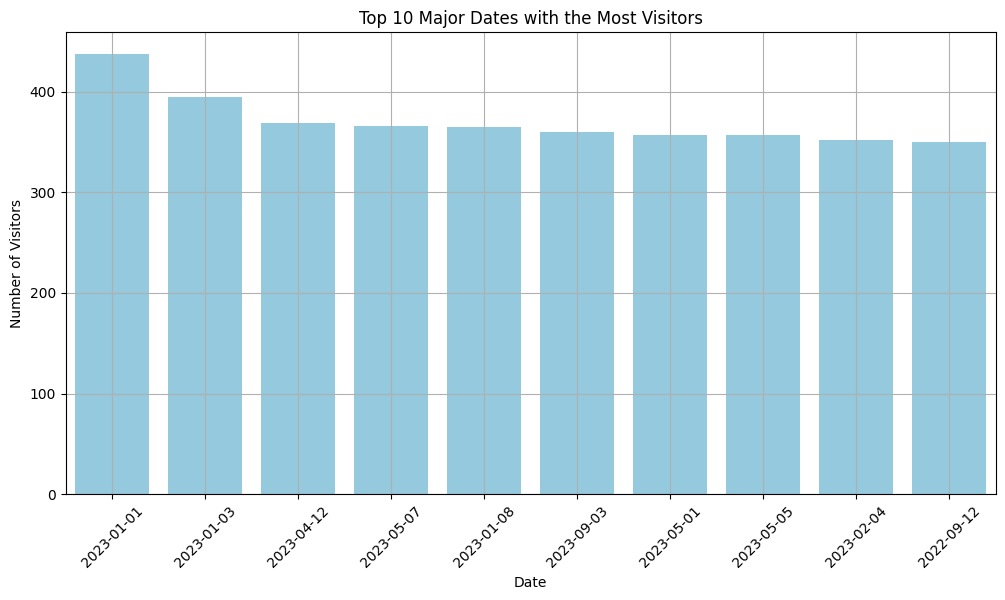

In [19]:
#date and most visitors
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
daily_visitors = data.groupby('Date')['No of Visitors'].sum().reset_index()
daily_visitors_sorted = daily_visitors.sort_values(by='No of Visitors', ascending=False)
top_n_dates = daily_visitors_sorted.head(10)  
plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='No of Visitors', data=top_n_dates, color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 10 Major Dates with the Most Visitors')
plt.xlabel('Date')
plt.ylabel('Number of Visitors')
plt.grid(True)
plt.show()

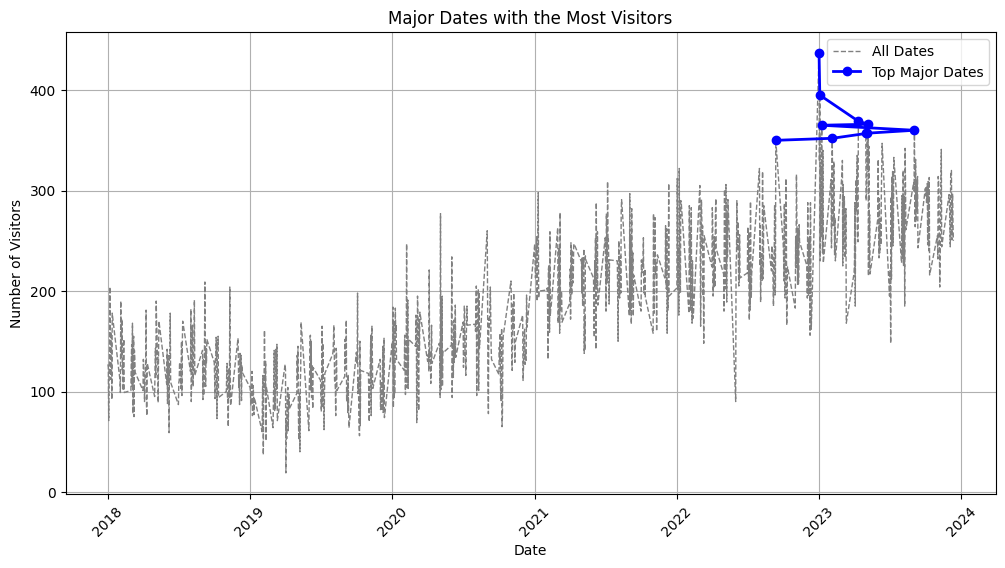

In [20]:
#date and most visitors
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
daily_visitors = data.groupby('Date')['No of Visitors'].sum().reset_index()
daily_visitors_sorted = daily_visitors.sort_values(by='No of Visitors', ascending=False)
top_n_dates = daily_visitors_sorted.head(10)  
plt.figure(figsize=(12, 6))
plt.plot(daily_visitors['Date'], daily_visitors['No of Visitors'], label='All Dates', color='gray', linestyle='--', linewidth=1)
plt.plot(top_n_dates['Date'], top_n_dates['No of Visitors'], label='Top Major Dates', color='blue', marker='o', linestyle='-', linewidth=2)

# Formatting the plot
plt.title('Major Dates with the Most Visitors')
plt.xlabel('Date')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

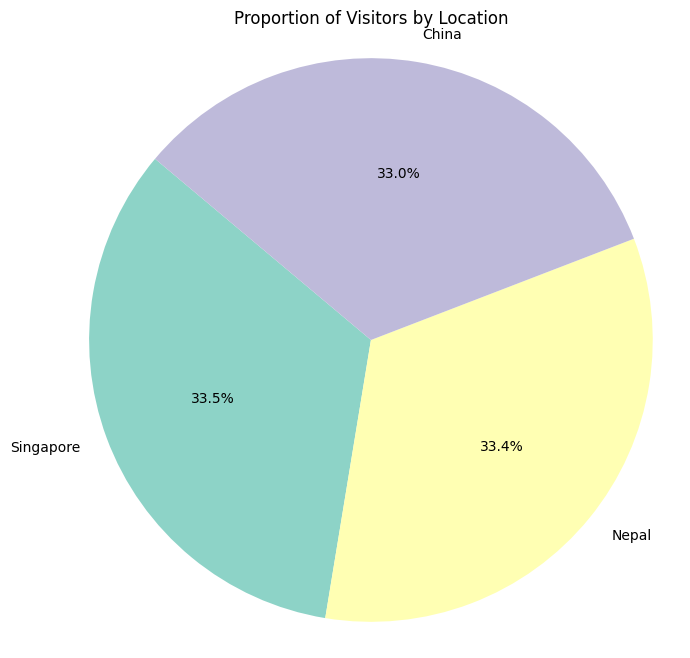

In [ ]:
visitor_count_by_location = data.groupby('Location')['No of Visitors'].sum().reset_index()

visitor_count_by_location = visitor_count_by_location.sort_values(by='No of Visitors', ascending=False)
plt.figure(figsize=(8, 8))
plt.pie(visitor_count_by_location['No of Visitors'], labels=visitor_count_by_location['Location'],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', len(visitor_count_by_location)))
plt.title('Proportion of Visitors by Location')
plt.axis('equal') 
plt.show()


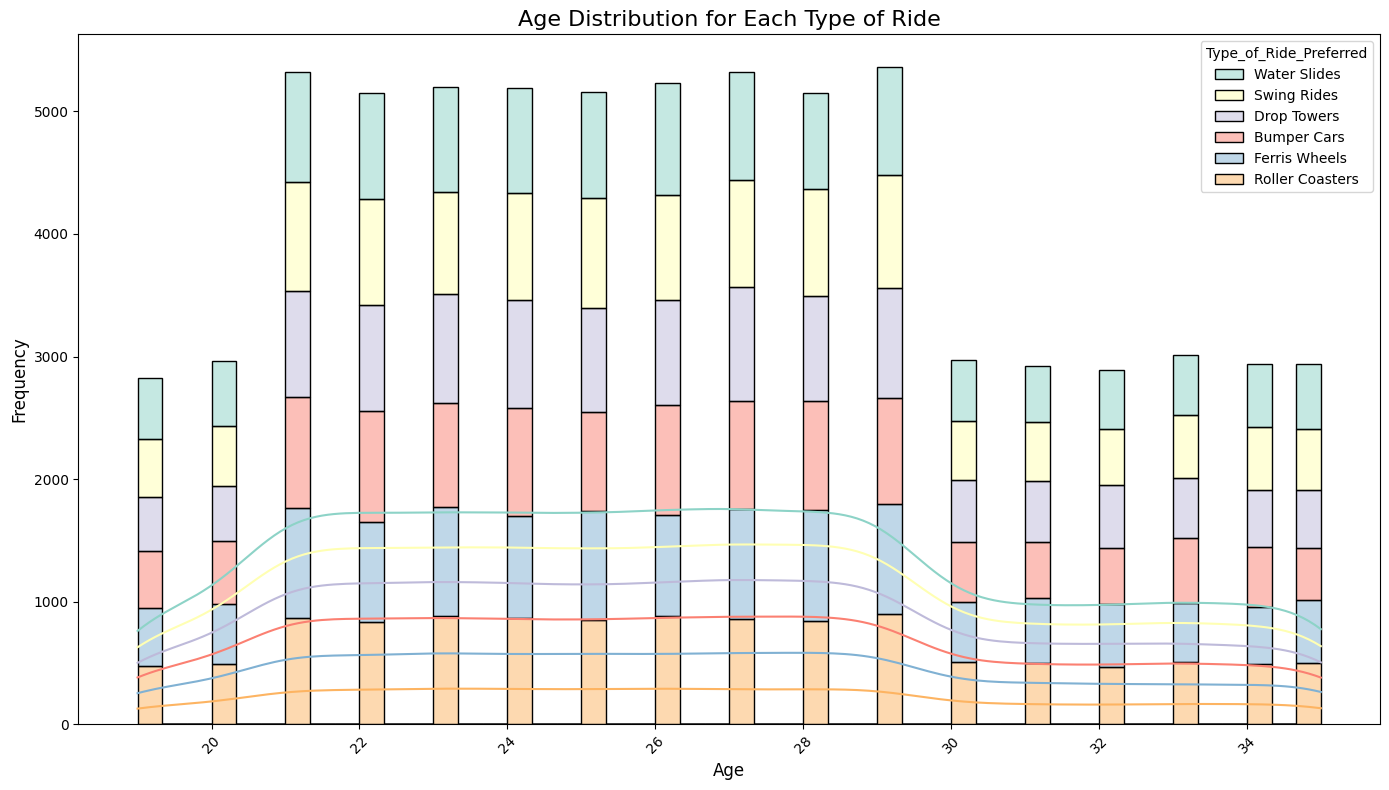

In [ ]:

# Age and ride prefered

plt.figure(figsize=(14, 8))
sns.histplot(data=data, x="Age", hue="Type_of_Ride_Preferred", multiple="stack", palette='Set3', kde=True)

plt.title('Age Distribution for Each Type of Ride', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#key takeaways 
Ages with Higher Visitors:

Ages 22 to 28 appear to have the highest number of visitors across all rides.
These bars are taller, showing that more visitors fall in this age range.
Most Popular Ride Types:

The larger contributions from Water Slides (green) and Drop Towers (purple) suggest these rides are consistently preferred across ages.
Age-Specific Insights:

Ages 18–22 show a relatively high frequency for certain rides like Roller Coasters (yellow) and Bumper Cars (red).
Ages 30+ have a noticeable drop in participation across all rides, which could suggest less interest from older age groups.


In [33]:
#Lowest satisfaction

location_satisfaction = data.groupby('Location')['Visitor_Satisfaction'].mean().reset_index()
lowest_satisfaction_location = location_satisfaction.loc[location_satisfaction['Visitor_Satisfaction'].idxmin()]
print("Location with the lowest customer satisfaction:")
print(f"Location: {lowest_satisfaction_location['Location']}")
print(f"Average Satisfaction Score: {lowest_satisfaction_location['Visitor_Satisfaction']}")


Location with the lowest customer satisfaction:
Location: Singapore
Average Satisfaction Score: 3.855234305549676


In [34]:
#highest satisfaction
location_satisfaction = data.groupby('Location')['Visitor_Satisfaction'].mean().reset_index()
location_satisfaction = location_satisfaction.sort_values(by='Visitor_Satisfaction', ascending=False)
highest_satisfaction_location = location_satisfaction.head(1)

print("Location with the highest customer satisfaction:")
print(f"Location: {highest_satisfaction_location['Location'].values[0]}")
print(f"Average Satisfaction Score: {highest_satisfaction_location['Visitor_Satisfaction'].values[0]}")

Location with the highest customer satisfaction:
Location: Nepal
Average Satisfaction Score: 3.8604930924548357


/tmp/ipykernel_99706/3448101619.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Visitor_Satisfaction', y='Location', data=location_satisfaction, palette='viridis')


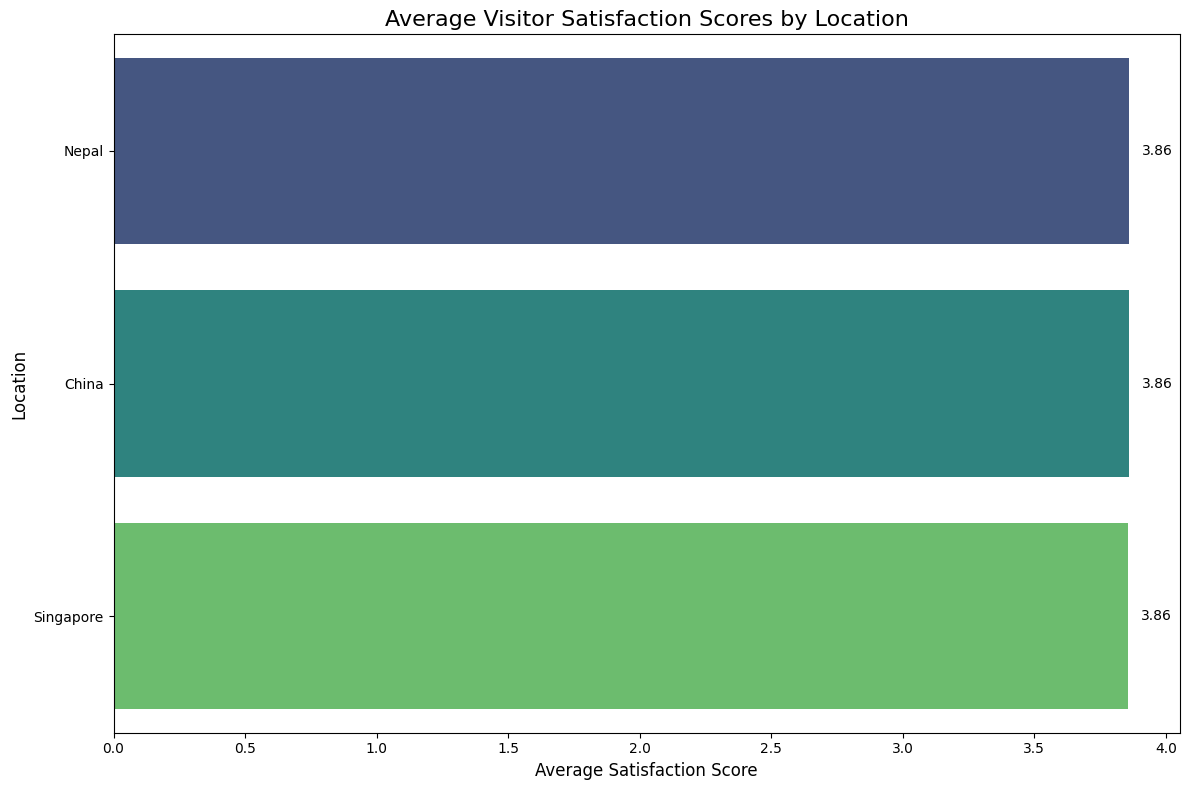

In [36]:
location_satisfaction = data.groupby('Location')['Visitor_Satisfaction'].mean().reset_index()
location_satisfaction = location_satisfaction.sort_values(by='Visitor_Satisfaction', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Visitor_Satisfaction', y='Location', data=location_satisfaction, palette='viridis')
plt.title('Average Visitor Satisfaction Scores by Location', fontsize=16)
plt.xlabel('Average Satisfaction Score', fontsize=12)
plt.ylabel('Location', fontsize=12)
for index, value in enumerate(location_satisfaction['Visitor_Satisfaction']):
    plt.text(value + 0.05, index, f"{value:.2f}", va='center', fontsize=10)
plt.tight_layout()
plt.show()


In [35]:
location_ride_quality = data.groupby('Location')['Ride_Quality_Rating'].mean().reset_index()
location_ride_quality = location_ride_quality.sort_values(by='Ride_Quality_Rating', ascending=False)
highest_ride_quality = location_ride_quality.head(1)
lowest_ride_quality = location_ride_quality.tail(1)
print("Location with the highest ride quality:")
print(f"Location: {highest_ride_quality['Location'].values[0]}")
print(f"Average Ride Quality Rating: {highest_ride_quality['Ride_Quality_Rating'].values[0]:.2f}")

print("\nLocation with the lowest ride quality:")
print(f"Location: {lowest_ride_quality['Location'].values[0]}")
print(f"Average Ride Quality Rating: {lowest_ride_quality['Ride_Quality_Rating'].values[0]:.2f}")


Location with the highest ride quality:
Location: Singapore
Average Ride Quality Rating: 3.50

Location with the lowest ride quality:
Location: China
Average Ride Quality Rating: 3.49


In [37]:
#cleanliness 
location_cleanliness = data.groupby('Location')['Cleanliness_Rating'].mean().reset_index()
location_cleanliness = location_cleanliness.sort_values(by='Cleanliness_Rating', ascending=False)
highest_cleanliness = location_cleanliness.head(1)
lowest_cleanliness = location_cleanliness.tail(1)
print("Location with the highest cleanliness rating:")
print(f"Location: {highest_cleanliness['Location'].values[0]}")
print(f"Average Cleanliness Rating: {highest_cleanliness['Cleanliness_Rating'].values[0]:.2f}")

print("\nLocation with the lowest cleanliness rating:")
print(f"Location: {lowest_cleanliness['Location'].values[0]}")
print(f"Average Cleanliness Rating: {lowest_cleanliness['Cleanliness_Rating'].values[0]:.2f}")

Location with the highest cleanliness rating:
Location: China
Average Cleanliness Rating: 3.86

Location with the lowest cleanliness rating:
Location: Nepal
Average Cleanliness Rating: 3.85


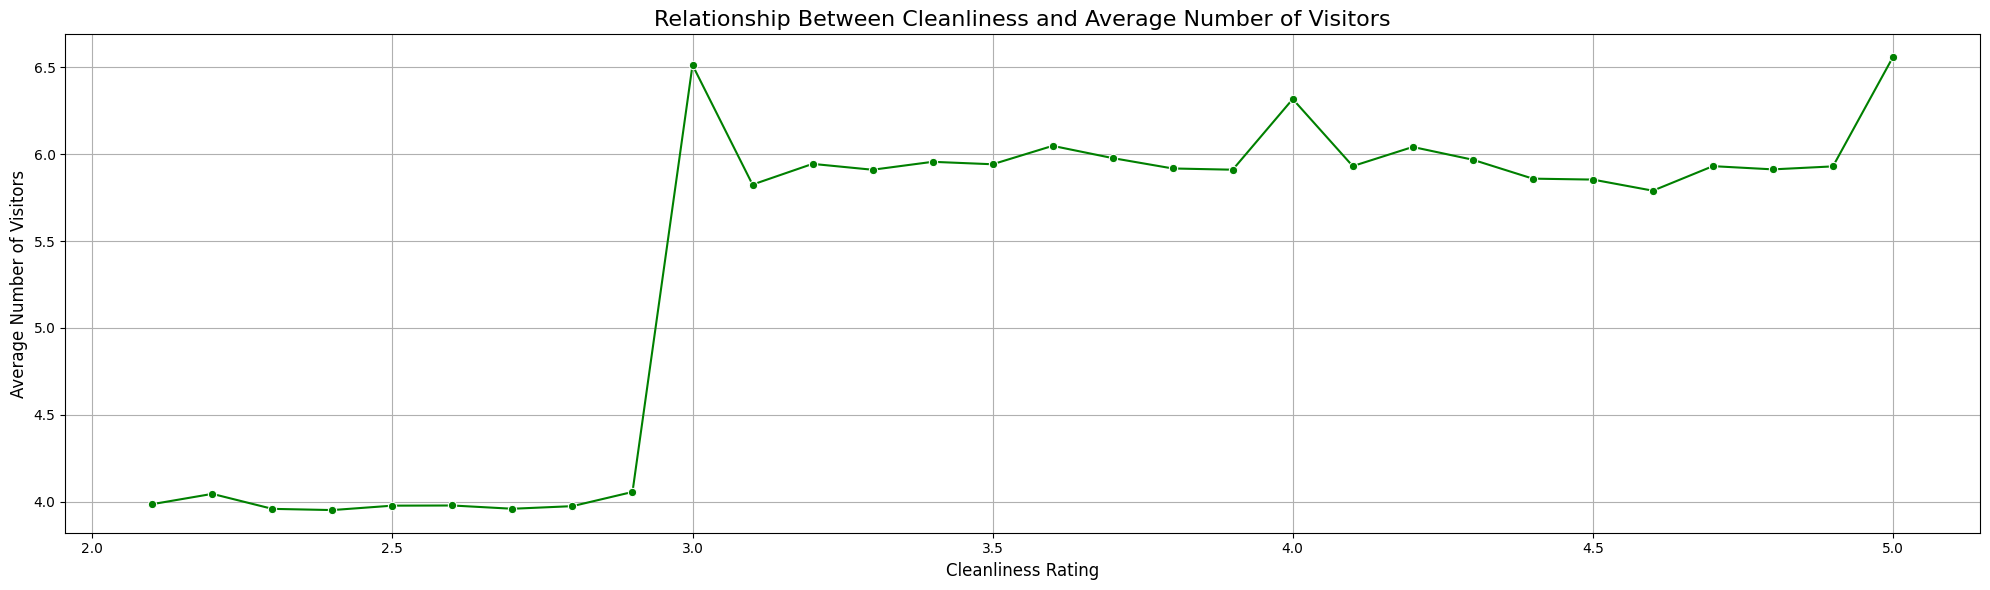

In [48]:
cleanliness_visitors = data.groupby('Cleanliness_Rating')['No of Visitors'].mean().reset_index()
plt.figure(figsize=(20, 6))
sns.lineplot(x='Cleanliness_Rating', y='No of Visitors', data=cleanliness_visitors, marker='o', color='green')
plt.title('Relationship Between Cleanliness and Average Number of Visitors', fontsize=16)
plt.xlabel('Cleanliness Rating', fontsize=12)
plt.ylabel('Average Number of Visitors', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

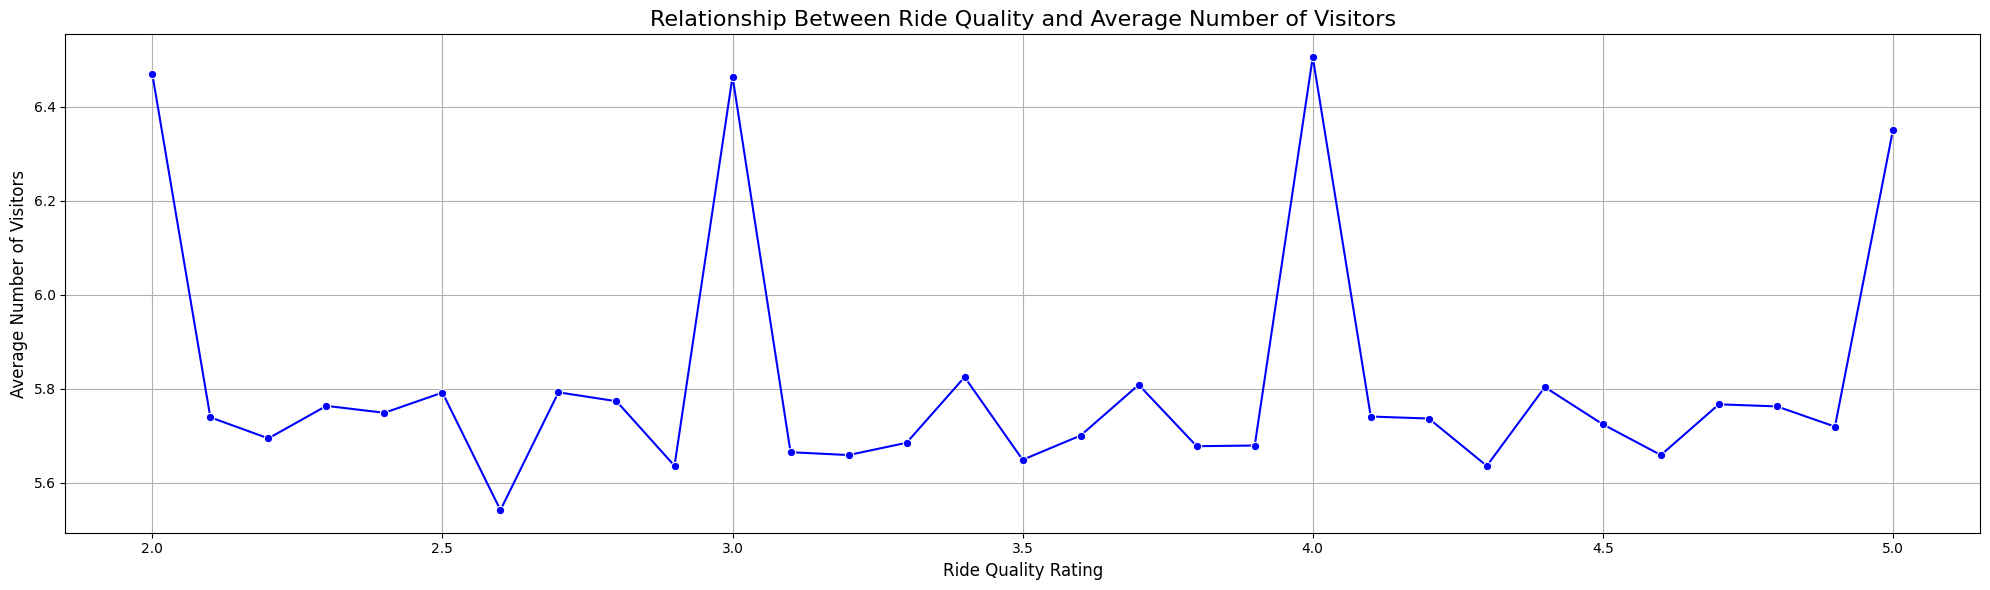

In [47]:
ride_quality_visitors = data.groupby('Ride_Quality_Rating')['No of Visitors'].mean().reset_index()


plt.figure(figsize=(20, 6))
sns.lineplot(x='Ride_Quality_Rating', y='No of Visitors', data=ride_quality_visitors, marker='o', color='blue')
plt.title('Relationship Between Ride Quality and Average Number of Visitors', fontsize=16)
plt.xlabel('Ride Quality Rating', fontsize=12)
plt.ylabel('Average Number of Visitors', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
